Eliazar Rodriguez Velasco

IDGS 91
ACTIVIDAD 5.1 

ENTRENAMIENTO NO SUPERVISADO

importar librerias

In [39]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#versiones

In [40]:
print("Pandas {}".format(pd.__version__))
print("Numpy{}".format(np.__version__))
print("matplotlib{}".format(matplotlib.__version__))
print("sklearn{}".format(sklearn.__version__))

Pandas 1.1.5
Numpy1.19.5
matplotlib3.2.2
sklearn1.0.1


#cargar el dataset

In [41]:
df = pd.read_csv("geisers.csv")


#informacion del dataframe

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TimeEruption  272 non-null    float64
 1   TimeWaiting   272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


In [43]:
df.head()

,TimeEruption,TimeWaiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [44]:
df.describe()

,TimeEruption,TimeWaiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


#graficar el dataframe

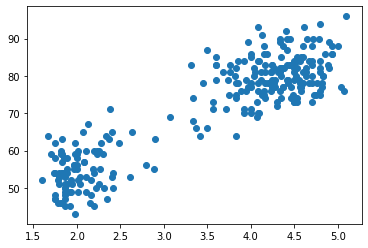

In [45]:
plt.scatter(df['TimeEruption'],df['TimeWaiting'])
plt.show()

#dato aleatorios

configurar modelo

In [46]:
model = KMeans(n_clusters=2,max_iter=100)

#esr¿tandarizar los datos

In [47]:
df = StandardScaler().fit_transform(df)

#graficar valores estandarizados

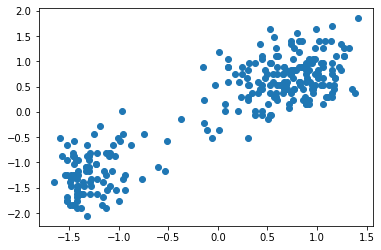

In [49]:
plt.scatter(df[:,0],df[:,1])
plt.show()

#entrenamiento

In [50]:
model.fit(df)

KMeans(max_iter=100, n_clusters=2)

#centroides

In [52]:
centroids = model.cluster_centers_
centroids

array([[-1.26008539, -1.20156744],
       [ 0.70970327,  0.67674488]])

#ver etiquetas

In [53]:
model.labels_

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1], dtype=int32)

#graficar centroides

<function matplotlib.pyplot.show>

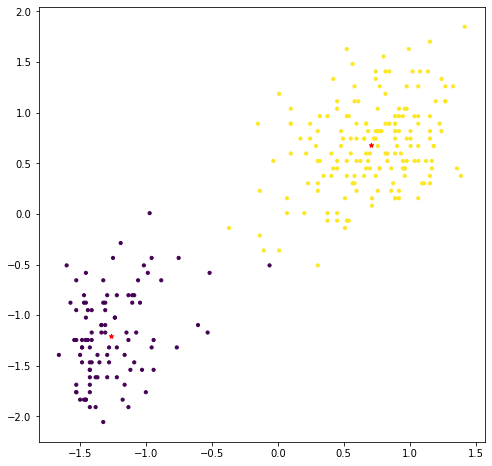

In [57]:
plt.figure(figsize=(8,8))
plt.scatter(df[:,0],df[:,1], c=model.labels_.astype(float),s=10,label="clusters")
plt.scatter(centroids[:,0],centroids[:,1],c='red',marker='*',s=20,label="centroids")
plt.show

#predicciones

In [58]:
new_label = model.predict([[0.5,-1.5]])
new_label[0]

0

#seleccionar el numero de clusters

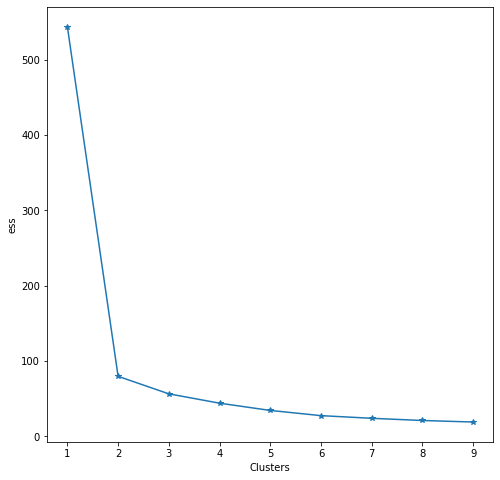

In [88]:
ess = [] 
list_k = list(range(1,10))

for k in list_k:
  model = KMeans(n_clusters=k)
  model.fit(df)
  ess.append(model.inertia_)

plt.figure(figsize=(8,8))
plt.plot(list_k,ess,"-*")
plt.xlabel("Clusters")
plt.ylabel("ess")
plt.show()

#graficar con distintos cluster

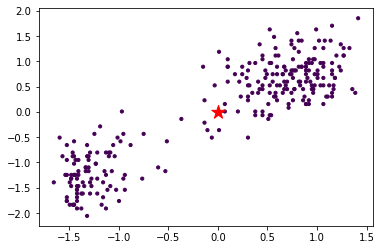

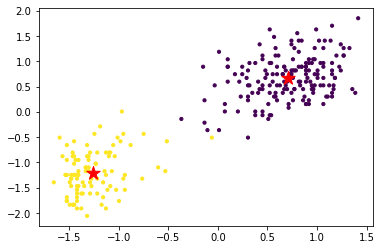

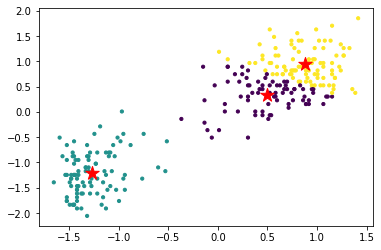

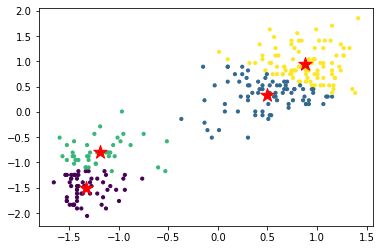

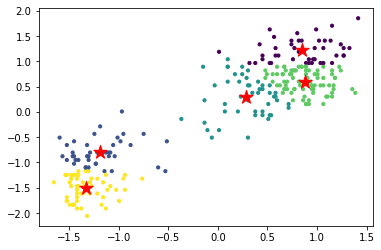

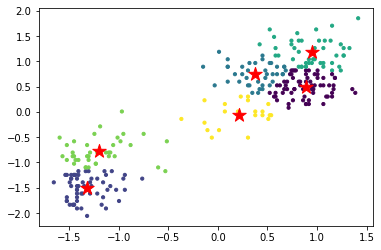

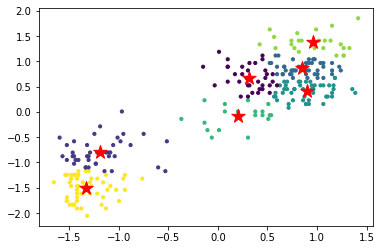

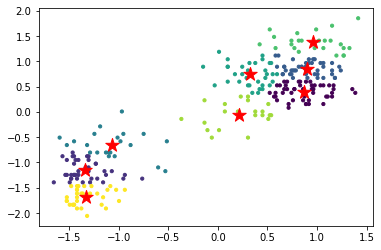

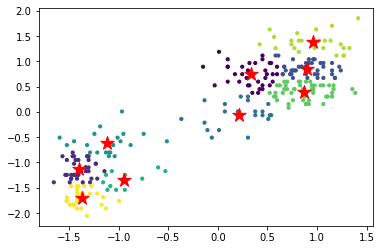

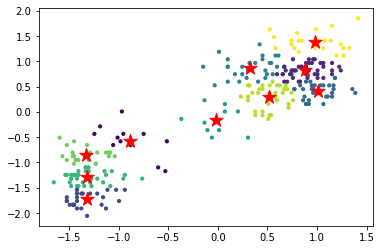

In [90]:
list_k = list(range(1,11))

for k in list_k:
  model = KMeans(n_clusters=k)
  model.fit(df)
  centroids = model.cluster_centers_
  plt.scatter(df[:,0],df[:,1], c=model.labels_.astype(float),s=10,label="clusters")
  plt.scatter(centroids[:,0],centroids[:,1],c='red',marker="*",s=200,label="centroides")
  plt.show()

el poder manejar la informacion adecuadamente nos ayudara a mejorar nuestras habilidades para poder lograr un entendimiento mejor de que es lo que buscamos y a donde queremos llevar ese e¿resultado 